In [98]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split

In [99]:
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *

#spacy.cli.download("en_core_web_sm")

In [100]:
glass_ml = pd.read_csv("glassdoor_ml.csv")

In [101]:
glass_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    841 non-null    int64  
 1   titles        831 non-null    object 
 2   companies     841 non-null    object 
 3   locations     839 non-null    object 
 4   reviews       688 non-null    float64
 5   descriptions  740 non-null    object 
 6   salaries      619 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 46.1+ KB


In [102]:
glass_analyst = pd.read_csv("glassdoor_analyst.csv")

In [103]:
glass_analyst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    900 non-null    int64  
 1   titles        900 non-null    object 
 2   companies     900 non-null    object 
 3   locations     900 non-null    object 
 4   reviews       757 non-null    float64
 5   descriptions  883 non-null    object 
 6   salaries      668 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 49.3+ KB


In [104]:
glass_data_engineer = pd.read_csv("glassdoor_data_engineer.csv")

In [105]:
df_final = pd.concat([glass_ml,glass_analyst],ignore_index=True)
#df_final = glass_ml.append([glass_analyst],ignore_index=True)

In [106]:
#df_final = glass_ml
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1741 non-null   int64  
 1   titles        1731 non-null   object 
 2   companies     1741 non-null   object 
 3   locations     1739 non-null   object 
 4   reviews       1445 non-null   float64
 5   descriptions  1623 non-null   object 
 6   salaries      1287 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 95.3+ KB


In [107]:
df_final = df_final.drop('Unnamed: 0',axis = 1)

In [108]:
df_final = df_final.dropna(subset=['salaries','descriptions','titles'])

In [109]:
df_final = df_final.drop_duplicates(keep='first',ignore_index = True)

In [110]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        1173 non-null   object 
 1   companies     1173 non-null   object 
 2   locations     1172 non-null   object 
 3   reviews       945 non-null    float64
 4   descriptions  1173 non-null   object 
 5   salaries      1173 non-null   object 
dtypes: float64(1), object(5)
memory usage: 55.1+ KB


In [111]:
df_final

,titles,companies,locations,reviews,descriptions,salaries
0,CAD Customization,Actalent,Chennai,3.6,Description:\n1. Hands-on expertise in develop...,₹4L - ₹7L (Glassdoor Est.)
1,Advisor-Data Science,Dell Technologies,Bengaluru,4.3,"As a Data Scientist, you will have a crucial r...",₹3L - ₹7L (Glassdoor Est.)
2,AI/ML Engineering Intern,Lizmotors Mobility Pvt Ltd.,Remote,NaN,"At Lizmotors, we're at the forefront of the te...",₹15T - ₹25T (Employer Est.)
3,Senior Advisor - Machine Learning Engineer,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹9L (Glassdoor Est.)
4,Data Science Consultant- AI Product Manager,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹8L (Glassdoor Est.)
...,...,...,...,...,...,...
1168,Payment Processig Analyst,Deutsche Bank,Bengaluru,4.0,Payment Processig Analyst\nJob ID: R0289497\nF...,₹5L - ₹7L (Glassdoor Est.)
1169,Payment Procesing Analyst,Deutsche Bank,Bengaluru,4.0,Payment Procesing Analyst\nJob ID: R0289506\nF...,₹5L - ₹7L (Glassdoor Est.)
1170,"Business Intelligence Engineer, ROW APEX Suppl...",ASSPL - Karnataka,Bengaluru,3.7,2+ years of analyzing and interpreting data wi...,₹6L - ₹8L (Glassdoor Est.)
1171,"System analyst, FBA Supply Chain",ADCI HYD 13 SEZ,Hyderābād,3.7,"Bachelor's degree in Computer Science, Mathema...",₹3L - ₹7L (Glassdoor Est.)


In [152]:
'''
def check_software(a):
    if re.search('software+\sengineer', a, re.IGNORECASE) != None:
        return False
    else :
        return True '''
    

"\ndef check_software(a):\n    if re.search('software+\\sengineer', a, re.IGNORECASE) != None:\n        return False\n    else :\n        return True "

In [153]:
'''df_final[df_final['titles'].map(check_software)]['titles'] '''

"df_final[df_final['titles'].map(check_software)]['titles'] "

In [154]:
#df_final = df_final[df_final['titles'].map(check_software)]

In [ ]:
df_final.salaries.unique()

array(['₹4L - ₹7L (Glassdoor Est.)', '₹3L - ₹7L (Glassdoor Est.)',
       '₹15T - ₹25T (Employer Est.)', '₹6L - ₹9L (Glassdoor Est.)',
       '₹6L - ₹8L (Glassdoor Est.)', '₹5L - ₹7L (Glassdoor Est.)',
       '₹1L - ₹3L (Glassdoor Est.)', '₹30L - ₹40L (Employer Est.)',
       '₹6L - ₹10L (Glassdoor Est.)', '₹4L - ₹5L (Glassdoor Est.)',
       '₹7L - ₹8L (Glassdoor Est.)', '₹5L - ₹8L (Glassdoor Est.)',
       '₹2L - ₹10L (Glassdoor Est.)', '₹8L - ₹9L (Glassdoor Est.)',
       '₹89T - ₹8L (Glassdoor Est.)', '₹15L - ₹20L (Employer Est.)',
       '₹4L - ₹6L (Glassdoor Est.)', '₹4L - ₹9L (Glassdoor Est.)',
       '₹96T - ₹9L (Glassdoor Est.)', '₹2L - ₹7L (Glassdoor Est.)',
       '₹23T - ₹28T (Employer Est.)', '₹25T - ₹45T (Employer Est.)',
       '₹4L - ₹10L (Glassdoor Est.)', '₹2L - ₹4L (Glassdoor Est.)',
       '₹9L (Glassdoor Est.)', '₹5L - ₹9L (Glassdoor Est.)',
       '₹7L - ₹10L (Glassdoor Est.)', '₹15T - ₹20T (Employer Est.)',
       '₹1L - ₹8L (Glassdoor Est.)', '₹10L (Glassdoor Es

In [113]:
df_final.salaries.map(lambda a: 'Glassdoor Est' in a ).sum()

919

In [114]:
df_final.salaries.map(lambda a: 'Employer Est' in a ).sum()

254

In [115]:
df_final =  df_final[df_final.salaries.map(lambda a: 'Glassdoor Est' in a )]

In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 1172
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   titles        919 non-null    object 
 1   companies     919 non-null    object 
 2   locations     919 non-null    object 
 3   reviews       880 non-null    float64
 4   descriptions  919 non-null    object 
 5   salaries      919 non-null    object 
dtypes: float64(1), object(5)
memory usage: 50.3+ KB


In [117]:
df_final

,titles,companies,locations,reviews,descriptions,salaries
0,CAD Customization,Actalent,Chennai,3.6,Description:\n1. Hands-on expertise in develop...,₹4L - ₹7L (Glassdoor Est.)
1,Advisor-Data Science,Dell Technologies,Bengaluru,4.3,"As a Data Scientist, you will have a crucial r...",₹3L - ₹7L (Glassdoor Est.)
3,Senior Advisor - Machine Learning Engineer,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹9L (Glassdoor Est.)
4,Data Science Consultant- AI Product Manager,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹8L (Glassdoor Est.)
5,ES - AWM Software Engineer - Senior Associate ...,PwC,Bengaluru,3.9,Line of Service\nAdvisory\nIndustry/Sector\nNo...,₹5L - ₹7L (Glassdoor Est.)
...,...,...,...,...,...,...
1168,Payment Processig Analyst,Deutsche Bank,Bengaluru,4.0,Payment Processig Analyst\nJob ID: R0289497\nF...,₹5L - ₹7L (Glassdoor Est.)
1169,Payment Procesing Analyst,Deutsche Bank,Bengaluru,4.0,Payment Procesing Analyst\nJob ID: R0289506\nF...,₹5L - ₹7L (Glassdoor Est.)
1170,"Business Intelligence Engineer, ROW APEX Suppl...",ASSPL - Karnataka,Bengaluru,3.7,2+ years of analyzing and interpreting data wi...,₹6L - ₹8L (Glassdoor Est.)
1171,"System analyst, FBA Supply Chain",ADCI HYD 13 SEZ,Hyderābād,3.7,"Bachelor's degree in Computer Science, Mathema...",₹3L - ₹7L (Glassdoor Est.)


In [118]:
df_final.salaries.map(lambda x: x.split('(')[0]).unique()

array(['₹4L - ₹7L ', '₹3L - ₹7L ', '₹6L - ₹9L ', '₹6L - ₹8L ',
       '₹5L - ₹7L ', '₹1L - ₹3L ', '₹6L - ₹10L ', '₹4L - ₹5L ',
       '₹7L - ₹8L ', '₹5L - ₹8L ', '₹2L - ₹10L ', '₹8L - ₹9L ',
       '₹89T - ₹8L ', '₹4L - ₹6L ', '₹4L - ₹9L ', '₹96T - ₹9L ',
       '₹2L - ₹7L ', '₹4L - ₹10L ', '₹2L - ₹4L ', '₹9L ', '₹5L - ₹9L ',
       '₹7L - ₹10L ', '₹1L - ₹8L ', '₹10L ', '₹3L - ₹6L ', '₹1L - ₹9L ',
       '₹5L - ₹6L ', '₹4L ', '₹3L - ₹5L ', '₹4L - ₹8L ', '₹6L - ₹7L ',
       '₹3L ', '₹9L - ₹10L ', '₹5L - ₹10L ', '₹8L - ₹12L ', '₹3L - ₹8L ',
       '₹7L - ₹9L ', '₹8L - ₹10L ', '₹5L ', '₹9L - ₹11L ', '₹4L - ₹12L ',
       '₹8L - ₹11L ', '₹3L - ₹10L ', '₹2L - ₹6L ', '₹2L - ₹5L ',
       '₹2L - ₹8L ', '₹3L - ₹9L ', '₹2L ', '₹3L - ₹4L ', '₹2L - ₹3L ',
       '₹2L - ₹9L ', '₹1L - ₹2L ', '₹10L - ₹11L ', '₹1L - ₹6L ',
       '₹4L - ₹11L ', '₹1L ', '₹41T - ₹67T ', '₹6L ', '₹8L ',
       '₹66T - ₹6L ', '₹7L ', '₹1L - ₹5L '], dtype=object)

In [119]:
df_final['salaries'] = df_final.salaries.map(lambda x: x.split('(')[0])

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\808524445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['salaries'] = df_final.salaries.map(lambda x: x.split('(')[0])


In [120]:
 df_final['salaries'].isna().sum()


0

In [121]:
def salary(s):
    if "hour" in s:
        upper = s.split('P')[0]
        lower = '₹0T'
        return lower.strip(),upper.strip(),'Hourly'
    elif s.count('T') == 2:
        lower = s.split('-')[0]
        upper = s.split('-')[1]
        return lower.strip(),upper.strip(),'Monthly'
    elif s.count('L') == 2:
        lower = s.split('-')[0]
        upper = s.split('-')[1]
        return lower.strip(),upper.strip(),'Yearly'
    elif s.count('T') == 1 and s.count('L') == 1 :
        lower = s.split('-')[0]
        upper = s.split('-')[1]
        return lower.strip(),upper.strip(),'Yearly'
    elif  s.count('T') == 1:
        lower = '₹0T'
        upper = s
        return lower.strip(),upper.strip(),'Monthly'
    elif s.count('L') == 1:
        lower = '₹0T'
        upper = s
        return lower.strip(),upper.strip(),'Yearly'
        

In [122]:

df_final['lower'],df_final['upper'],df_final['Paid Rate'] = zip(*df_final['salaries'].map(salary))

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\3549236818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['lower'],df_final['upper'],df_final['Paid Rate'] = zip(*df_final['salaries'].map(salary))
C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\3549236818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['lower'],df_final['upper'],df_final['Paid Rate'] = zip(*df_final['salaries'].map(salary))
C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\3549236818.py:1: SettingWithCopyWarnin

In [123]:
df_final.upper.isna().sum()

0

In [124]:
def find_amt(text):
    if text.startswith('₹'):
        thousand = re.search(r'₹?([\d\.]+)[T]', text.replace(",", ""))
        lakh = re.search(r'₹?([\d\.]+)[L]', text.replace(",", ""))
        no = re.search(r'₹?([\d\.]+)', text.replace(",", ""))
        if thousand:
            h = thousand.groups()[0]
            return float(h) * 1000
        elif lakh:
            h = lakh.groups()[0]
            return float(h) * 100000
        elif no:
            h = no.groups()[0]
            return float(h)
    return None

In [125]:
df_final['lower'] = df_final['lower'].map(find_amt)
df_final['upper'] = df_final['upper'].map(find_amt)

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\2895573759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['lower'] = df_final['lower'].map(find_amt)
C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\2895573759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['upper'] = df_final['upper'].map(find_amt)


In [126]:
def avg_salary(df):
    avg = (df['lower'] + df['upper'])/2
    if df['Paid Rate'] == 'Hourly':
        avg *= 40*52
    elif df['Paid Rate'] == 'Monthly':
        avg *= 12
    elif df['Paid Rate'] == 'Yearly':
        avg
    return avg

In [127]:
 df_final['avg_salary'] = df_final.apply(avg_salary,axis = 1)

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\1296477982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['avg_salary'] = df_final.apply(avg_salary,axis = 1)


In [128]:
df_final   

,titles,companies,locations,reviews,descriptions,salaries,lower,upper,Paid Rate,avg_salary
0,CAD Customization,Actalent,Chennai,3.6,Description:\n1. Hands-on expertise in develop...,₹4L - ₹7L,400000.0,700000.0,Yearly,550000.0
1,Advisor-Data Science,Dell Technologies,Bengaluru,4.3,"As a Data Scientist, you will have a crucial r...",₹3L - ₹7L,300000.0,700000.0,Yearly,500000.0
3,Senior Advisor - Machine Learning Engineer,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹9L,600000.0,900000.0,Yearly,750000.0
4,Data Science Consultant- AI Product Manager,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹8L,600000.0,800000.0,Yearly,700000.0
5,ES - AWM Software Engineer - Senior Associate ...,PwC,Bengaluru,3.9,Line of Service\nAdvisory\nIndustry/Sector\nNo...,₹5L - ₹7L,500000.0,700000.0,Yearly,600000.0
...,...,...,...,...,...,...,...,...,...,...
1168,Payment Processig Analyst,Deutsche Bank,Bengaluru,4.0,Payment Processig Analyst\nJob ID: R0289497\nF...,₹5L - ₹7L,500000.0,700000.0,Yearly,600000.0
1169,Payment Procesing Analyst,Deutsche Bank,Bengaluru,4.0,Payment Procesing Analyst\nJob ID: R0289506\nF...,₹5L - ₹7L,500000.0,700000.0,Yearly,600000.0
1170,"Business Intelligence Engineer, ROW APEX Suppl...",ASSPL - Karnataka,Bengaluru,3.7,2+ years of analyzing and interpreting data wi...,₹6L - ₹8L,600000.0,800000.0,Yearly,700000.0
1171,"System analyst, FBA Supply Chain",ADCI HYD 13 SEZ,Hyderābād,3.7,"Bachelor's degree in Computer Science, Mathema...",₹3L - ₹7L,300000.0,700000.0,Yearly,500000.0


In [129]:
df_final.groupby('Paid Rate').salaries.count()

Paid Rate
Monthly      1
Yearly     918
Name: salaries, dtype: int64

In [130]:
import seaborn as sns
df_final['avg_salary'].skew()

-0.3125379703432572

<Axes: >

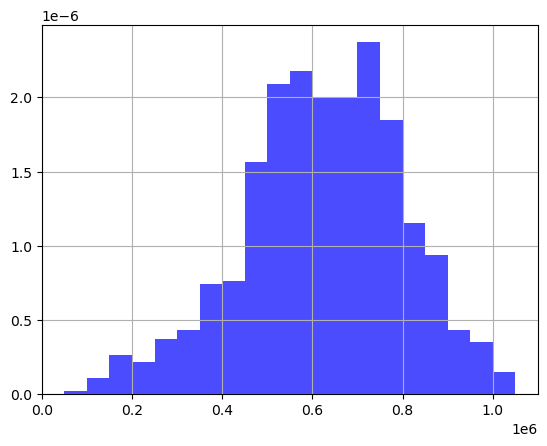

In [131]:
df_final['avg_salary'].hist(bins = 20, density=True, alpha=0.7, color='blue')

In [132]:
df_final[df_final['avg_salary'] > 1000000].count()

titles          3
companies       3
locations       3
reviews         3
descriptions    3
salaries        3
lower           3
upper           3
Paid Rate       3
avg_salary      3
dtype: int64

In [133]:
'''
quartile1 = df_final['avg_salary'].quantile(0.05)
quartile3 = df_final['avg_salary'].quantile(0.95)
iqr = quartile3 - quartile1
lower = quartile1 - 1.5 * iqr
upper = quartile3 +1.5 *iqr 
'''

"\nquartile1 = df_final['avg_salary'].quantile(0.05)\nquartile3 = df_final['avg_salary'].quantile(0.95)\niqr = quartile3 - quartile1\nlower = quartile1 - 1.5 * iqr\nupper = quartile3 +1.5 *iqr \n"

In [237]:
#quartile1 -(1.5 * iqr)

-1117500.0

In [239]:
'''
df_final.loc[(df_final['avg_salary'] > upper,'avg_salary')] = upper
df_final.loc[(df_final['avg_salary'] < lower),'avg_salary'] = lower 
'''

<Axes: >

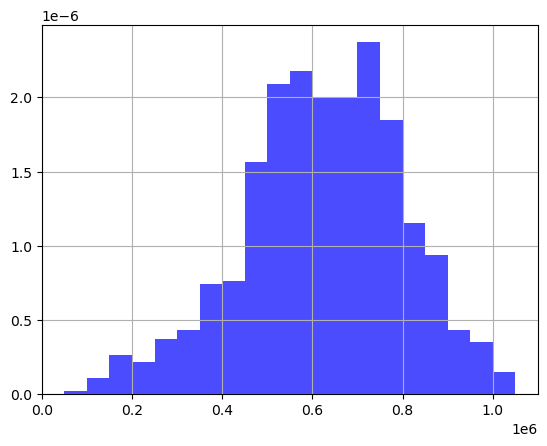

In [134]:
df_final['avg_salary'].hist(bins = 20, density=True, alpha=0.7, color='blue')

In [135]:
df_final['avg_salary'].unique()

array([ 550000.,  500000.,  750000.,  700000.,  600000.,  200000.,
        800000.,  450000.,  650000.,  850000.,  444500.,  498000.,
        300000.,  400000.,  150000.,  950000., 1000000.,  900000.,
        250000.,  350000.,  100000., 1050000.,   50000.,  648000.,
        333000.])

In [179]:
'₹1,800.00 Per hour'.split('P')[0]

'₹1,800.00 '

In [180]:
pd.qcut(df_final['avg_salary'],q=5,precision =1)

0       (450000.0, 550000.0]
1       (450000.0, 550000.0]
3       (650000.0, 750000.0]
4       (650000.0, 750000.0]
5       (550000.0, 650000.0]
                ...         
1859    (550000.0, 650000.0]
1862    (550000.0, 650000.0]
1864    (450000.0, 550000.0]
1865    (550000.0, 650000.0]
1867    (450000.0, 550000.0]
Name: avg_salary, Length: 1494, dtype: category
Categories (5, interval[float64, right]): [(49999.9, 450000.0] < (450000.0, 550000.0] < (550000.0, 650000.0] < (650000.0, 750000.0] < (750000.0, 1050000.0]]

<Axes: >

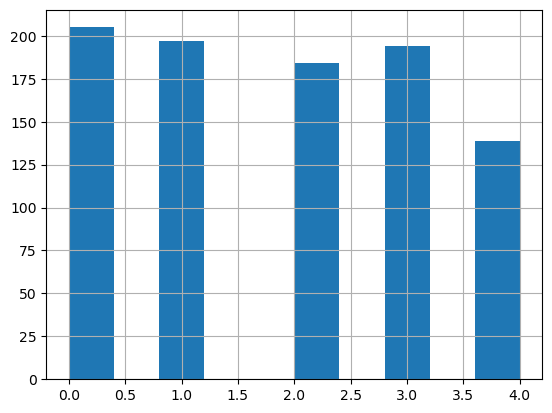

In [137]:
pd.qcut(df_final['avg_salary'],q=5,precision =1,labels = [0,1,2,3,4]).hist()

In [138]:
BINS = [0,450000,550000,650000,750000,1500000]

df_final['Salary_Bins'] =pd.cut(x=df_final['avg_salary'], bins=BINS, labels=['0','1','2','3','4'])

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\3733661800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Salary_Bins'] =pd.cut(x=df_final['avg_salary'], bins=BINS, labels=['0','1','2','3','4'])


C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\932606567.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_final.groupby('Salary_Bins')['descriptions'].count().plot.bar()


([<matplotlib.axis.XTick at 0x2248bca1ba0>,
 [Text(0, 0, '0 - 450000'),
  Text(1, 0, '450000 - 550000'),
  Text(2, 0, '550000 - 650000'),
  Text(3, 0, '650000 - 750000'),
  Text(4, 0, '750000 - 1500000')])

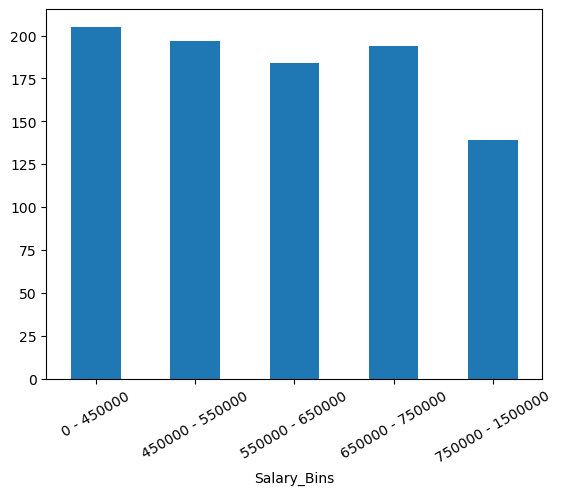

In [139]:
df_final.groupby('Salary_Bins')['descriptions'].count().plot.bar()
plt.xticks([0,1,2,3,4],['0 - 450000','450000 - 550000','550000 - 650000','650000 - 750000','750000 - 1500000'],rotation =30)

In [140]:
import unidecode
unidecode.unidecode('Hyderābād')

'Hyderabad'

In [141]:
 df_final['locations'] = df_final['locations'].map(lambda a: unidecode.unidecode(str(a)))

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\2959951592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['locations'] = df_final['locations'].map(lambda a: unidecode.unidecode(str(a)))


In [142]:
df_final['locations'].unique()

array(['Chennai', 'Bengaluru', 'Gurgaon', 'Mumbai', 'Hyderabad', 'Jammu',
       'Pune', 'Jaipur', 'Ahmedabad', 'Bhubaneshwar', 'Calcutta',
       'Bhilai', 'Gandhinagar', 'Cochin', 'Kalkaji Devi', 'Nagpur',
       'Noida', 'Indore', 'Thiruvananthapuram', 'Mohali', 'Ujjain',
       'Chandigarh', 'Coimbatore', 'Lucknow', 'Ranchi', 'Salem',
       'Navi Mumbai', 'Surat', 'Thane', 'Calicut', 'Kharar', 'Vadodara',
       'Alandi', 'Hat'], dtype=object)

In [143]:
in_cities = pd.read_csv('list_of_cities.csv')
city = set(in_cities['Name of City'])
[c for c in df_final['locations'].unique() if c not in city]

['Bhubaneshwar',
 'Calcutta',
 'Bhilai',
 'Gandhinagar',
 'Cochin',
 'Kalkaji Devi',
 'Navi Mumbai',
 'Calicut',
 'Alandi',
 'Hat']

In [144]:
city.add('Ghaziabad')
city.add('Gangtok')
city.add('Cuddalore')
city.add('Navi Mumbai')
city.add('Tiruchchirappalli')
city.add('Ambala')
city.add('Eranakulam')
city.add('Calicut')
city.add('Gandhinagar')
city.add('Bhubaneshwar')

In [145]:
df_final.loc[df_final['locations'] == 'Calcutta','locations'] = 'Kolkata'
df_final.loc[df_final['locations'] == 'Cochin','locations'] = 'Kochi'

In [146]:
def ret_city(cit):
    if cit in city:
        return cit
    else:
        return 'Other'

In [147]:
df_final['City'] = df_final['locations'].map(ret_city)

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\2610483290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['City'] = df_final['locations'].map(ret_city)


In [148]:
def is_city(cit):
    if cit in city:
        return 1
    else:
        return 0

In [149]:
df_final['is_city'] = df_final['locations'].map(is_city) 

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\3394003784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['is_city'] = df_final['locations'].map(is_city)


In [150]:
df_final

,titles,companies,locations,reviews,descriptions,salaries,lower,upper,Paid Rate,avg_salary,Salary_Bins,City,is_city
0,CAD Customization,Actalent,Chennai,3.6,Description:\n1. Hands-on expertise in develop...,₹4L - ₹7L,400000.0,700000.0,Yearly,550000.0,1,Chennai,1
1,Advisor-Data Science,Dell Technologies,Bengaluru,4.3,"As a Data Scientist, you will have a crucial r...",₹3L - ₹7L,300000.0,700000.0,Yearly,500000.0,1,Bengaluru,1
3,Senior Advisor - Machine Learning Engineer,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹9L,600000.0,900000.0,Yearly,750000.0,3,Bengaluru,1
4,Data Science Consultant- AI Product Manager,Dell Technologies,Bengaluru,4.3,Data Science is all about breaking new ground ...,₹6L - ₹8L,600000.0,800000.0,Yearly,700000.0,3,Bengaluru,1
5,ES - AWM Software Engineer - Senior Associate ...,PwC,Bengaluru,3.9,Line of Service\nAdvisory\nIndustry/Sector\nNo...,₹5L - ₹7L,500000.0,700000.0,Yearly,600000.0,2,Bengaluru,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,Payment Processig Analyst,Deutsche Bank,Bengaluru,4.0,Payment Processig Analyst\nJob ID: R0289497\nF...,₹5L - ₹7L,500000.0,700000.0,Yearly,600000.0,2,Bengaluru,1
1169,Payment Procesing Analyst,Deutsche Bank,Bengaluru,4.0,Payment Procesing Analyst\nJob ID: R0289506\nF...,₹5L - ₹7L,500000.0,700000.0,Yearly,600000.0,2,Bengaluru,1
1170,"Business Intelligence Engineer, ROW APEX Suppl...",ASSPL - Karnataka,Bengaluru,3.7,2+ years of analyzing and interpreting data wi...,₹6L - ₹8L,600000.0,800000.0,Yearly,700000.0,3,Bengaluru,1
1171,"System analyst, FBA Supply Chain",ADCI HYD 13 SEZ,Hyderabad,3.7,"Bachelor's degree in Computer Science, Mathema...",₹3L - ₹7L,300000.0,700000.0,Yearly,500000.0,1,Hyderabad,1


In [151]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.replace(r"\n",' ')
    df[text_field] = df[text_field].str.lower()
    return df

In [152]:
df_final["combined_text"] = df_final["titles" ] + " "+ df_final["descriptions"]

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\2048059090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["combined_text"] = df_final["titles" ] + " "+ df_final["descriptions"]


In [153]:
standardize_text(df_final,"combined_text")['combined_text'][0]

C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\540289982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].str.replace(r"http\S+", "")
C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\540289982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].str.replace(r"http", "")
C:\Users\sendh\AppData\Local\Temp\ipykernel_29876\540289982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

"cad customization description:\n1. hands-on expertise in developing: a. automation projects in catia b. customization in catia c. macros/scripts and add-ins in ms excel 2. expertise in following technologies (min. any 3 from below): a. vba b. vb.net c. catscript d. python e. java/javascript f. other similar technologies 3. excellent knowledge of using catia & vismockup api's (for automation) & using vba & python 4. added advantage to have: a. alteryx b. machine learning skills/tools c. modeling & drafting knowledge using catia d. teamcenter / vismockup 5. responsible to: a. gather requirements from end-users b. conduct feasibility studies & propose solutions c. create proof-of-concept (poc) with selected architectural approach d. design, develop and test concepts e. create documentation 6. good presentation and communication skills 7. job role based on relevant experience\nskills:\nfixture, design, catia, biw fixture\ntop skills details:\nfixture,design,catia,biw fixture\nadditional s

<Axes: >

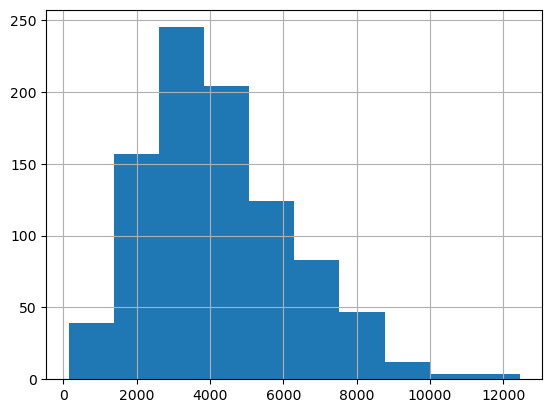

In [154]:
df_final['combined_text'].map(lambda a: len(a)).hist()

In [155]:
max?

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

In [156]:
max_len = max(df_final['combined_text'].map(lambda a: len(a)))
longest_text = df_final[df_final['combined_text'].map(lambda a: len(a) == max_len)]['combined_text']

In [157]:
df_final.iloc[635]['combined_text']

"market data analyst ss&c is a global provider of investment and financial services and software for the financial services and healthcare industries. named to fortune 1000 list as top u.s. company based on revenue, ss&c is headquartered in windsor, connecticut and has 20,000+ employees in over 90 offices in 35 countries. some 18,000 financial services and healthcare organizations, from the world's largest institutions to local firms, manage and account for their investments using ss&c's products and services.\njob description\neze software is seeking a motivated market data analyst to work on our market data solution out of our hyderabad office. eze software is a leading global provider of best-in-breed software solutions and technology services designed to maximize investment and operational alpha for the entire institutional investment process and community. our vision: to lead a reimagined investment process by creating a completely open, seamless, and fluid investment ecosystem.\n

In [158]:
def process_words(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += list(string.ascii_lowercase)
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)
    return pd.Series(jd_data)
                
    

In [159]:
text = process_words(df_final['combined_text']).map(' '.join)

In [160]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sendh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
tokenized = process_words(df_final['combined_text'])

In [162]:
tokenized[0]

['cad',
 'customization',
 'description',
 'hands',
 'expertise',
 'developing',
 'automation',
 'projects',
 'catia',
 'customization',
 'catia',
 'macros',
 'scripts',
 'add',
 'ins',
 'ms',
 'excel',
 'expertise',
 'following',
 'technologies',
 'min',
 'vba',
 'vb',
 'net',
 'catscript',
 'python',
 'java',
 'javascript',
 'similar',
 'technologies',
 'excellent',
 'knowledge',
 'using',
 'catia',
 'vismockup',
 "api's",
 'automation',
 'using',
 'vba',
 'python',
 'added',
 'advantage',
 'alteryx',
 'machine',
 'learning',
 'skills',
 'tools',
 'modeling',
 'drafting',
 'knowledge',
 'using',
 'catia',
 'teamcenter',
 'vismockup',
 'responsible',
 'gather',
 'requirements',
 'end',
 'users',
 'conduct',
 'feasibility',
 'studies',
 'propose',
 'solutions',
 'create',
 'proof',
 'concept',
 'poc',
 'selected',
 'architectural',
 'approach',
 'design',
 'develop',
 'test',
 'concepts',
 'create',
 'documentation',
 'good',
 'presentation',
 'communication',
 'skills',
 'job',
 'role

In [163]:
all_text = [ word for text in tokenized for word in text]
fdist  = FreqDist(all_text)
fdist.most_common(100)

[('data', 6532),
 ('experience', 4447),
 ('business', 3815),
 ('work', 3104),
 ('team', 2665),
 ('skills', 2388),
 ('management', 1834),
 ('development', 1574),
 ('working', 1526),
 ('solutions', 1515),
 ('knowledge', 1472),
 ('support', 1380),
 ('ability', 1347),
 ('technology', 1338),
 ('analysis', 1316),
 ('role', 1309),
 ('job', 1298),
 ('us', 1293),
 ('strong', 1255),
 ('global', 1226),
 ('years', 1193),
 ('analytics', 1190),
 ('requirements', 1171),
 ('world', 1143),
 ('design', 1132),
 ('process', 1123),
 ('teams', 1114),
 ('people', 1101),
 ('tools', 1090),
 ('technical', 1089),
 ('engineering', 1072),
 ('learning', 1069),
 ('analyst', 1045),
 ('across', 1028),
 ('new', 1024),
 ('services', 1003),
 ('software', 980),
 ('systems', 976),
 ('environment', 937),
 ('quality', 933),
 ('product', 927),
 ('understanding', 918),
 ('ai', 906),
 ('customer', 899),
 ('develop', 874),
 ('including', 873),
 ('company', 854),
 ('opportunity', 850),
 ('information', 839),
 ('clients', 834),
 (

In [164]:
all_text = [ word for text in tokenized for word in text]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_text)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [165]:
scored

[(('machine', 'learning'), 0.0017511162360386693),
 (('years', 'experience'), 0.0010914307933656026),
 (('communication', 'skills'), 0.001069977608238023),
 (('problem', 'solving'), 0.0010485244231104437),
 (('data', 'science'), 0.0010431611268285489),
 (('data', 'analysis'), 0.000943940145613494),
 (('equal', 'opportunity'), 0.0009358952011906518),
 (('data', 'analytics'), 0.000874217293948861),
 (('job', 'description'), 0.0008125393867070702),
 (('opportunity', 'employer'), 0.0008044944422842279),
 (('sexual', 'orientation'), 0.0008018127941432805),
 (('experience', 'working'), 0.0007347715906195948),
 (('national', 'origin'), 0.0007347715906195948),
 (('computer', 'science'), 0.0006891835722234885),
 (('gender', 'identity'), 0.0006865019240825411),
 (('skills', 'ability'), 0.0006704120352368566),
 (('power', 'bi'), 0.000654322146391172),
 (('cross', 'functional'), 0.0006516404982502246),
 (('join', 'us'), 0.0006435955538273823),
 (('ability', 'work'), 0.0006328689612635926),
 (('bus

In [166]:
all_text = [ word for text in tokenized for word in text]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_text)
finder.apply_freq_filter(30)
scored = finder.score_ngrams(bigram_measures.pmi)
scored

[(('sky', 'seas'), 13.46405449632197),
 (('axa', 'xl'), 13.298995250051474),
 (('screen', 'readers'), 13.116131192901662),
 (('seabed', 'outer'), 13.049016997043125),
 (('american', 'express'), 12.883328988487284),
 (('teammate', 'welcoming'), 12.739061543821839),
 (('accept', 'unlawful'), 12.632489879623796),
 (('legacy', 'century'), 12.607398898660964),
 (('welcoming', 'respectful'), 12.506138454993222),
 (('smarter', 'flying'), 12.35870149617574),
 (('unlawful', 'discrimination'), 12.318624056800408),
 (('safer', 'smarter'), 12.03677340128838),
 (('readers', 'offering'), 12.032715184714025),
 (('root', 'cause'), 11.953439337060896),
 (('virtual', 'phone'), 11.92850418972589),
 (('readiness', 'modernization'), 11.911242519204519),
 (('characteristics', 'covered'), 11.84117576147453),
 (('voice', 'heard'), 11.780528161117227),
 (('phone', 'interviews'), 11.752347234572063),
 (('ci', 'cd'), 11.738692584847852),
 (('ad', 'hoc'), 11.714032749330316),
 (('third', 'party'), 11.624932528445

In [167]:
!pip install wordcloud

In [168]:
df_final['combined_text']

0       cad customization description:\n1. hands-on ex...
1       advisor-data science as a data scientist, you ...
3       senior advisor - machine learning engineer dat...
4       data science consultant- ai product manager da...
5       es - awm software engineer - senior associate ...
                              ...                        
1168    payment processig analyst payment processig an...
1169    payment procesing analyst payment procesing an...
1170    business intelligence engineer, row apex suppl...
1171    system analyst, fba supply chain bachelor's de...
1172    senior analyst - private product support about...
Name: combined_text, Length: 919, dtype: object

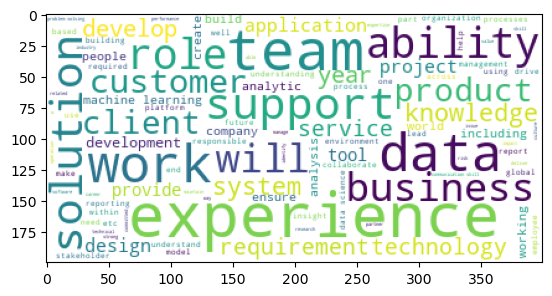

In [169]:
from wordcloud import WordCloud, STOPWORDS
stop = set(STOPWORDS)
text = ' '.join(i for i in df_final['combined_text'])
cloud = WordCloud(stopwords=stop,max_font_size=50,max_words=100,background_color='white',random_state=1).generate(text)
plt.imshow(cloud)

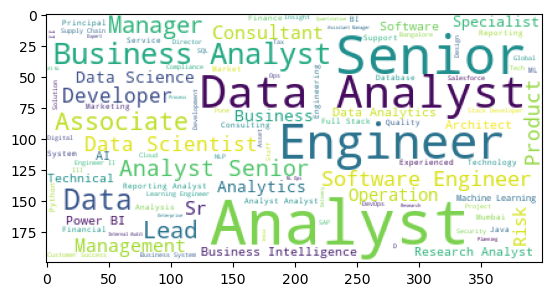

In [170]:
from wordcloud import WordCloud, STOPWORDS
stop = set(STOPWORDS)
text = ' '.join(i for i in df_final['titles'])
cloud = WordCloud(stopwords=stop,max_font_size=50,max_words=100,background_color='white',random_state=1).generate(text)
plt.imshow(cloud)

In [171]:
salary_df = df_final[['titles','reviews','Paid Rate','avg_salary','City','is_city','combined_text','Salary_Bins']]

In [172]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 1172
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   titles         919 non-null    object  
 1   reviews        880 non-null    float64 
 2   Paid Rate      919 non-null    object  
 3   avg_salary     919 non-null    float64 
 4   City           919 non-null    object  
 5   is_city        919 non-null    int64   
 6   combined_text  919 non-null    object  
 7   Salary_Bins    919 non-null    category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 90.8+ KB


In [173]:
salary_df.to_csv('salary_df3.csv')

In [174]:
import re
p = re.compile(r"([a-zA-Z]+(?:'[a-z]+)?)")
count =0
for m in p.finditer(df_final['combined_text'][1]):
    print(m.start(), m.group())
    count += len(m.group())

0 advisor
8 data
13 science
21 as
24 a
26 data
31 scientist
42 you
46 will
51 have
56 a
58 crucial
66 role
71 in
74 shaping
82 our
86 data
91 driven
98 decision
107 making
114 process
123 this
128 role
133 involves
142 applying
151 advanced
160 knowledge
170 of
173 generative
184 ai
187 models
195 large
201 language
210 models
218 llms
225 deep
230 learning
240 and
244 reinforcement
258 learning
267 principles
279 the
283 candidate
293 will
298 be
301 required
310 to
313 develop
321 impactful
331 data
336 models
343 and
347 predictive
358 algorithms
370 create
377 compelling
388 recommendations
404 based
410 on
413 data
418 insights
428 lead
433 partnerships
446 with
451 the
455 academic
464 and
468 business
477 community
488 and
492 influence
502 strategic
512 decisions
523 we
526 are
530 looking
538 for
542 a
544 seasoned
553 data
558 scientist
568 who
572 can
576 transform
586 complex
594 data
599 into
604 actionable
615 insights
625 lead
630 challenging
642 ai
645 projects
655 and
